# Linear Kernel

In [3]:
from sklearn import svm
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X, y = make_classification(
    100,              # 100개의 샘플
    2,                # 2차원 (시각화용)
    n_redundant=0,    # 불필요한 특징 없음
    n_informative=2,  # 모든 특징이 유용
    n_clusters_per_class=1, # 각 클래스당 1개 클러스터
    class_sep=2.0,    # 클래스 간 큰 간격
    random_state=42
)

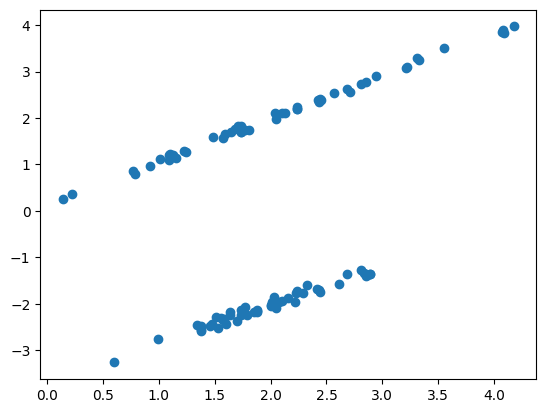

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [13]:
linear_svm = svm.SVC(
    kernel='linear',
    C=10
)

In [14]:
linear_svm.fit(X, y)

,C,10
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
linear_svm.score(X, y)

1.0

In [10]:
linear_svm.support_vectors_

array([[ 2.32272135, -1.59340317],
       [ 0.78801347,  0.79334842],
       [ 0.14147759,  0.26526486]])

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


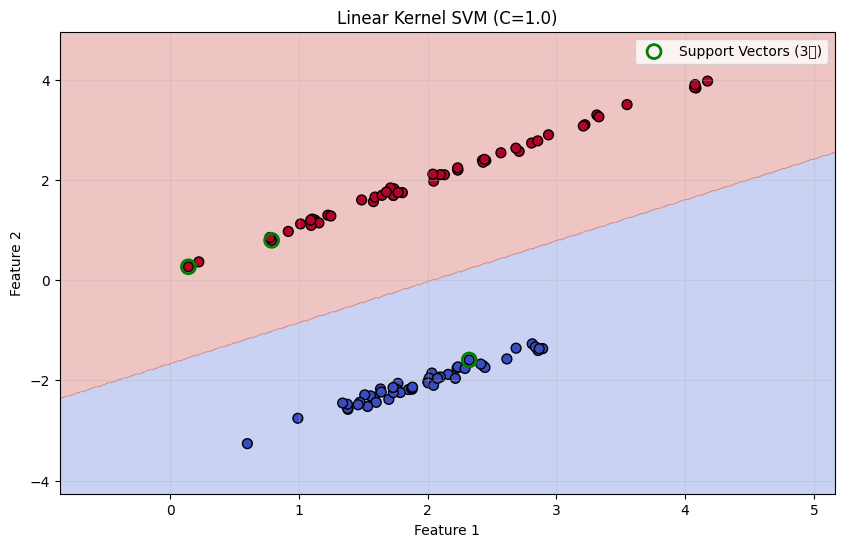

In [15]:
def plot_decision_boundary(clf, X, y, title):
    """SVM 결정 경계를 시각화하는 함수"""
    
    # 메쉬 그리드 생성을 위한 범위 설정
    h = .02  # 메쉬 간격
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # 메쉬 그리드 생성
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # 각 메쉬 포인트에서 예측
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    # 데이터 포인트
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', 
               edgecolors='black', s=50)
    
    # Support Vectors 강조
    plt.scatter(clf.support_vectors_[:, 0], 
               clf.support_vectors_[:, 1], 
               s=100, facecolors='none', 
               edgecolors='green', linewidths=2,
               label=f'Support Vectors ({len(clf.support_)}개)')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 시각화 실행
plot_decision_boundary(linear_svm, X, y, 'Linear Kernel SVM (C=1.0)')

# Polynomial Kernel

In [17]:
np.random.seed(42)

In [18]:
X_nonlinear = np.random.randn(200, 2) # 2차원 데이터 200개 생성

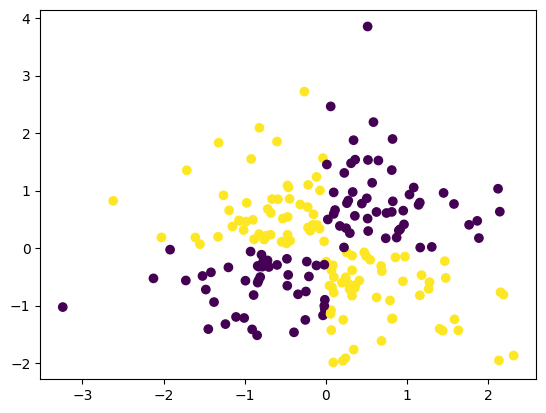

In [23]:
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear)

In [21]:
y_nonlinear = np.logical_xor(
    X_nonlinear[:,0] > 0, 
    X_nonlinear[:,1] > 0
).astype(int)
y_nonlinear

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1])

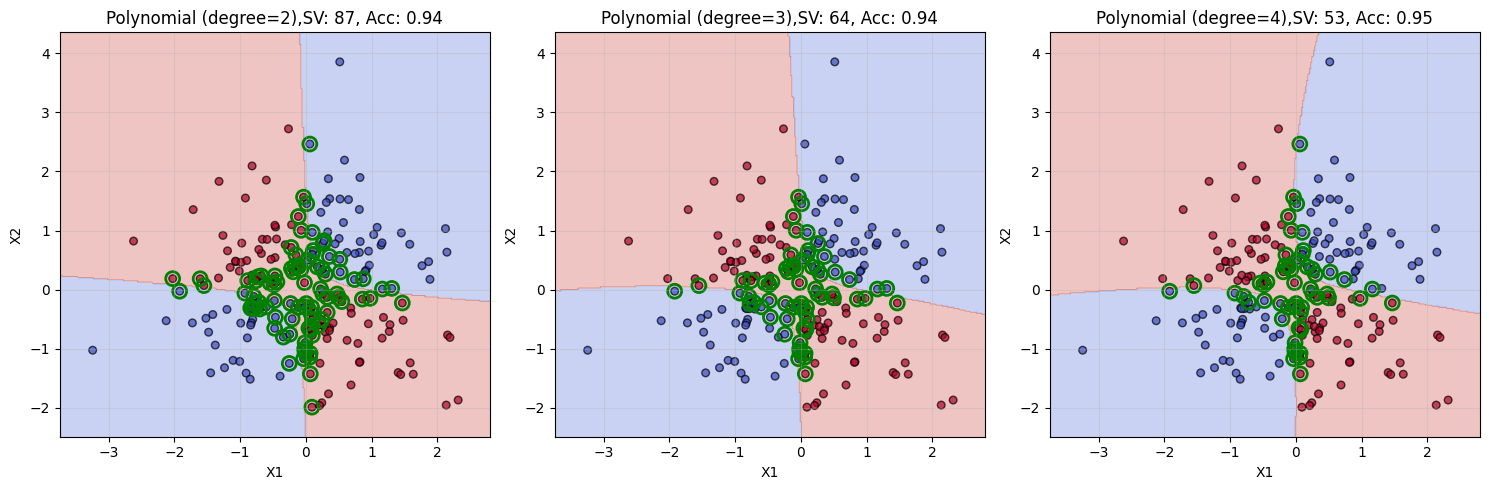

In [31]:
# 다양한 degree로 Polynomial Kernel SVM 학습
degrees = [2, 3, 4]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, degree in enumerate(degrees):
    ax = axes[idx]
    
    # Polynomial Kernel SVM 생성 및 학습
    clf_poly = svm.SVC(
        kernel='poly', 
        degree=degree,      # 다항식 차수
        gamma='auto',       # 자동 gamma 설정
        C=1.0,             # 기본 C 값
        coef0=1            # 상수항
    )
    clf_poly.fit(X_nonlinear, y_nonlinear)
    
    # 결정 경계 그리기
    h = .02
    x_min = X_nonlinear[:, 0].min() - 0.5
    x_max = X_nonlinear[:, 0].max() + 0.5
    y_min = X_nonlinear[:, 1].min() - 0.5
    y_max = X_nonlinear[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 시각화
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], 
              c=y_nonlinear, cmap='coolwarm', 
              s=30, edgecolors='black', alpha=0.7)
    
    # Support Vectors 표시
    ax.scatter(clf_poly.support_vectors_[:, 0],
              clf_poly.support_vectors_[:, 1],
              s=100, facecolors='none', 
              edgecolors='green', linewidths=2)
    
    # 제목과 정보
    ax.set_title(f'Polynomial (degree={degree}),SV: {len(clf_poly.support_)}, Acc: {clf_poly.score(X_nonlinear, y_nonlinear):.2f}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# RBF Kernel

In [32]:
from sklearn.datasets import make_circles

In [33]:
X_circles, y_circles = make_circles(200, factor=0.5, noise=0.1, random_state=42)

In [35]:
import seaborn as sns

<Axes: >

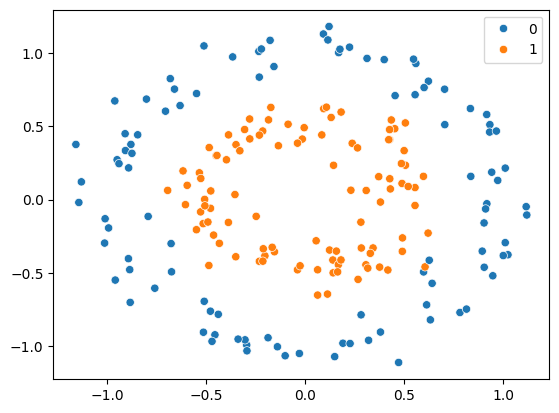

In [37]:
sns.scatterplot(x=X_circles[:, 0], y=X_circles[:, 1], hue=y_circles)

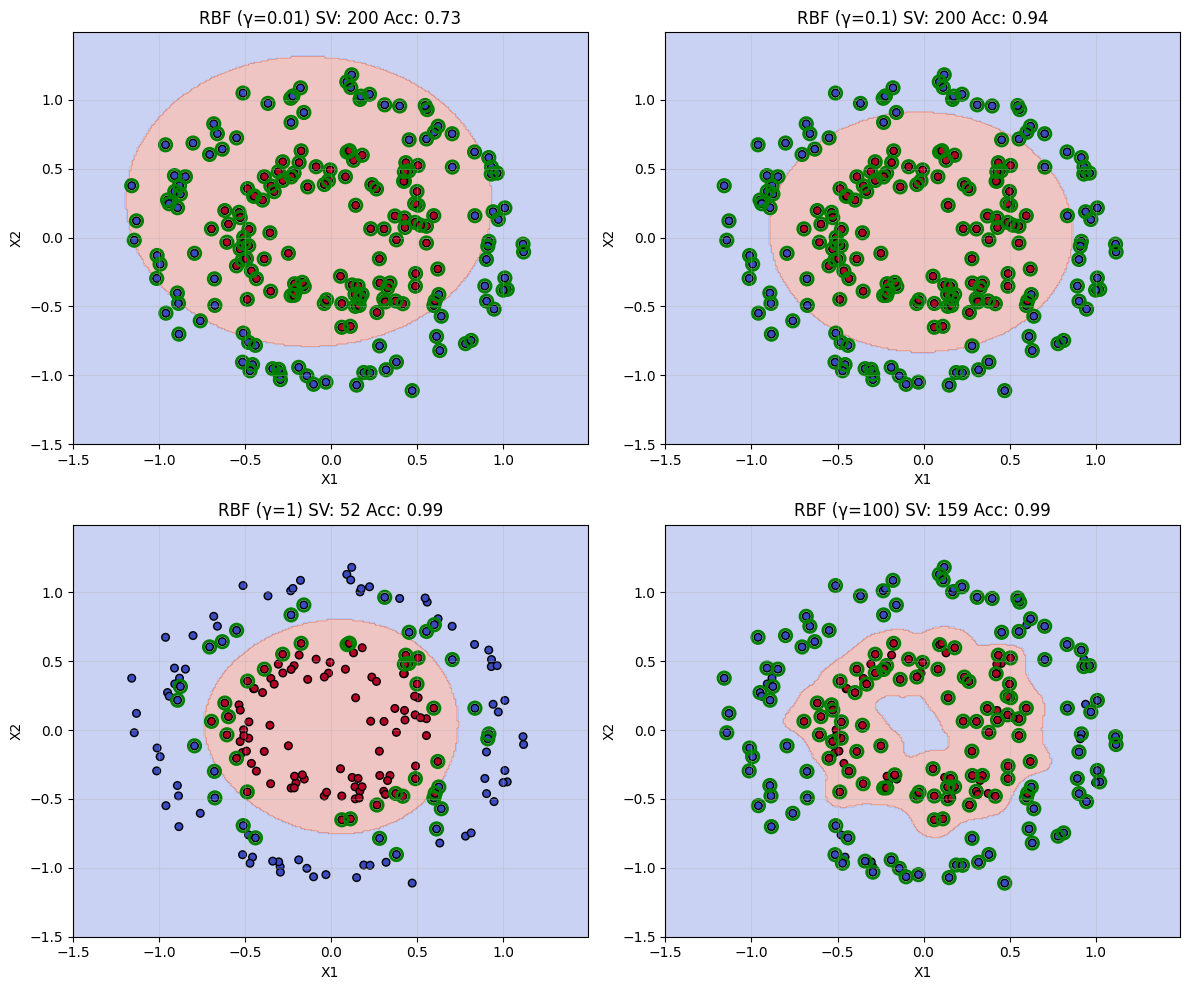

In [43]:
gamma_values = [0.01, 0.1, 1, 100]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, gamma in enumerate(gamma_values):
    ax = axes[idx//2, idx%2]

    clf_rbf = svm.SVC(kernel='rbf', gamma=gamma)
    clf_rbf.fit(X_circles, y_circles)

    h = .01 # 0.01
    x_min, x_max, y_min, y_max = -1.5, 1.5, -1.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

# 시각화
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X_circles[:, 0], X_circles[:, 1], 
              c=y_circles, cmap='coolwarm', 
              s=30, edgecolors='black')
    
    # Support Vectors
    ax.scatter(clf_rbf.support_vectors_[:, 0], 
              clf_rbf.support_vectors_[:, 1],
              s=80, facecolors='none', 
              edgecolors='green', linewidths=2)
    
    ax.set_title(f'RBF (γ={gamma}) SV: {len(clf_rbf.support_)} Acc: {clf_rbf.score(X_circles, y_circles):.2f}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(300, 300))

# 최적 파라미터 찾기

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [45]:
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf']
}

In [46]:
grid_search = GridSearchCV(
    svm.SVC(),
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1
)

In [47]:
grid_search.fit(X_circles, y_circles)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [48]:
X_test, y_test = make_circles(50, factor=0.5, noise=0.1, random_state=42)

In [49]:
grid_search.best_params_

{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}

In [50]:
grid_search.best_estimator_.score(X_test, y_test)

1.0

In [53]:
import pandas as pd
result = pd.DataFrame(grid_search.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001465,0.000698,0.001490,0.000992,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.475,0.675,0.550,0.450,0.475,0.525,0.082158,18
1,0.001302,0.000621,0.000820,0.000205,0.1,0.10,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.625,0.925,0.700,0.625,0.675,0.710,0.111355,17
2,0.001565,0.001608,0.000589,0.000099,0.1,1.00,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.975,1.000,1.000,1.000,0.950,0.985,0.020000,7
3,0.000730,0.000084,0.000517,0.000071,0.1,10.00,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",1.000,1.000,0.975,1.000,0.975,0.990,0.012247,1
4,0.000720,0.000107,0.000472,0.000035,0.1,100.00,rbf,"{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}",1.000,0.950,0.750,0.925,0.975,0.920,0.088600,14
5,0.000785,0.000344,0.000473,0.000070,1.0,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.475,0.675,0.550,0.450,0.475,0.525,0.082158,18
6,0.000706,0.000101,0.000476,0.000047,1.0,0.10,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.650,0.925,0.700,0.675,0.700,0.730,0.099247,16
7,0.000535,0.000040,0.000356,0.000016,1.0,1.00,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.975,1.000,1.000,1.000,0.975,0.990,0.012247,1
8,0.000659,0.000029,0.000610,0.000222,1.0,10.00,rbf,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}",0.975,1.000,1.000,1.000,0.975,0.990,0.012247,1
9,0.000878,0.000049,0.000487,0.000081,1.0,100.00,rbf,"{'C': 1, 'gamma': 100, 'kernel': 'rbf'}",1.000,0.975,0.925,0.950,0.975,0.965,0.025495,10


In [54]:
pivot_table = result.pivot_table(values='mean_test_score', index='param_gamma', columns='param_C')

In [55]:
pivot_table

param_C,0.1,1.0,10.0,100.0
param_gamma,,,,
0.01,0.525,0.525,0.525,0.735
0.10,0.710,0.730,0.980,0.990
1.00,0.985,0.990,0.990,0.990
10.00,0.990,0.990,0.975,0.965
100.00,0.920,0.965,0.960,0.955
